# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Muhammad Raihan Fauzi
- **Email:** muhammad.raihan.fauzi@gmail.com
- **ID Dicoding:** mraihanfauzi

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak terjual dan yang terendah ?
- Bagaimana sebaran pesanan berdasarkan waktu hari dan bulan ? Apakah ada pola musiman ?
- Bagaimana performa penjualan dan revenue keseluruhan e-commerce dalam beberapa tahun terakhir ?
- Berapa banyak pesanan yang memiliki rating tinggi (3-5) dibandingkan dengan rating rendah (1-2) ?
- Bagaimana retensi pelanggan (customer retention) atau churn rate (pelanggan yang hanya beli sekali pada marketplace Olist)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Insight:**
- Dataset berhasil terload dari repository github pribadi dan berhasil ditampilkan, hal tersebut terbukti dari masing-masing data yang berhasil ditampilkan melalui "(namafile).head()"
- Data geolocation, order_payments, dan seller hanya ditampilkan pada tahap Gathering Data tetapi tidak dilanjutkan pada proses selanjutnya karena berdasarkan 5 pertanyaan yang diperoleh dari proses EDA, ditemukan bahwa 3 data tersebut tidak diperlukan untuk menjawab 5 pertanyaan yang akan dijawab.
- Untuk menjawab beberapa pertanyaan akan terdapat beberada data yang digabungkan dari masing-masing dataframe.

##### Memuat Tabel Customers

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Brazilian_E-Commerce_Public_Dataset/refs/heads/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### Memuat Tabel Geolocation

In [3]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Brazilian_E-Commerce_Public_Dataset/refs/heads/main/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


##### Memuat Tabel Order Items

In [4]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Brazilian_E-Commerce_Public_Dataset/refs/heads/main/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##### Memuat Tabel Order Payments

In [5]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Brazilian_E-Commerce_Public_Dataset/refs/heads/main/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##### Memuat Tabel Order Reviews

In [6]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Brazilian_E-Commerce_Public_Dataset/refs/heads/main/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


##### Memuat Tabel Orders

In [7]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Brazilian_E-Commerce_Public_Dataset/refs/heads/main/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### Memuat Tabel Products

In [8]:
products_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Brazilian_E-Commerce_Public_Dataset/refs/heads/main/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### Memuat Tabel Sellers

In [9]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/mraihanfauzii/Brazilian_E-Commerce_Public_Dataset/refs/heads/main/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

##### Assesing Customers Data

In [10]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [12]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Missing values: Tidak ada, sehingga tidak perlu ada penghapusan baris.
- Data duplikat: Tidak ditemukan, sehingga tidak perlu drop duplicates.
- Tipe data: Sudah sesuai.

##### Assesing Order Items Data

In [14]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [16]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Missing values: Tidak ada, sehingga tidak perlu ada penghapusan baris.
- Data duplikat: Tidak ditemukan, sehingga tidak perlu drop duplicates.
- Tipe data: Walaupun shipping_limit_date tidak digunakan tetapi tetap akan dikonversi menjadi datetime agar data menjadi bersih serta siap untuk digunakan agar dapat digunakan dilain hari jika diperlukan untuk dibandingkan dengan data lain seperti order_delivered_carrier_date atau lainnya.

##### Assesing Order Reviews Data

In [18]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [20]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Missing values: terdapat banyak missing values pada review_comment_title dan review_comment_message karena biasanya pada online store untuk sistem rating isiannya wajib mengisi score tetapi bisa untuk tidak menulis review_comment_title dan review_comment_meesage. Oleh karena itu walaupun 2 data tersebut tidak digunakan karena tidak berkaitan dengan 5 pertanyaan diatas akan tetap dibersihkan dengan mengisinya dengan 'No comment'.
- Data duplikat: Tidak ditemukan, sehingga tidak perlu drop duplicates.
- Tipe data: Walaupun pada kasus ini tidak digunakan untuk menjawab 5 pertanyaan tersebut tetapi review_creation_date dan review_answer_timestamp akan di konversi menjadi datetime.

##### Assesing Orders Data

In [22]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [24]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Missing values: order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date akan dibiarkan karena itu menandakan pesanan belum di approve seller, pesanan belum dikirim, dan pesanan belum sampai. Karena pesanan yang belum selesai itu kecil kemungkinannya untuk cancel atau ada masalah jadi dapat dikatakan kemungkinannya besar sekali untuk pesanan selesai dan sampai ke customer.
- Data duplikat: Tidak ditemukan, sehingga tidak perlu drop duplicates.
- Tipe data: Semua yang berkaitan dengan waktu akan dikonversi menjadi datetime untuk analisis tren penjualan pada pertanyaan #2 dan #3. walaupun hanya butuh satu saja yaitu order_purchase_time_stamp tetap yang lainnya juga akan dikonversi menjadi datetime.

##### Assesing Products Data

In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [28]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Missing values: product_category_name yang kosong yaitu 610 baris akan diisi dengan "unknown_category", kemudian untuk product_name_length,product_description_lenght, product_photos_qty sama juga masing-masing 610 data kosong akan diisi dengan 0, dan untuk data product_weight_g, product_length_cm, product_height_cm, product_width_cm masing-masing kosong 2 data maka akan di drop datanya. Alasan 610 data tidak di drop karena angka tersebut besar dengan menghapusnya maka akan lumayan kehilangan informasi karena bisa saja data tersebut berkaitan dengan transaksi di tabel lain seperti pada order_items.
- Data duplikat: Tidak ditemukan, sehingga tidak perlu drop duplicates.
- Tipe data: Sudah sesuai.

### Cleaning Data

##### Cleaning Order Items Data

In [30]:
order_items_df['shipping_limit_date'] = pd.to_datetime(
    order_items_df['shipping_limit_date'], errors='coerce'
)
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- shipping_limit_date berhasil diubah tipe data-nya menjadi datetime

##### Cleaning Order Reviews Data

In [31]:
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No comment')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No comment')

order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [32]:
order_reviews_df['review_creation_date'] = pd.to_datetime(
    order_reviews_df['review_creation_date'], errors='coerce'
)
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(
    order_reviews_df['review_answer_timestamp'], errors='coerce'
)

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
- Berhasil mengisi missing value pada review_comment_title dan review_comment_message menjadi "No comment"
- Berhasil mengubah tipe data review_creation_date dan review_answer_timestamp menjadi datetime

##### Cleaning Orders Data

In [33]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(
    orders_df['order_purchase_timestamp'], errors='coerce'
)

orders_df['year'] = orders_df['order_purchase_timestamp'].dt.year
orders_df['month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['day_of_week'] = orders_df['order_purchase_timestamp'].dt.day_name()
orders_df['year_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

orders_df['order_approved_at'] = pd.to_datetime(
    orders_df['order_approved_at'], errors='coerce'
)
orders_df['order_delivered_carrier_date'] = pd.to_datetime(
    orders_df['order_delivered_carrier_date'], errors='coerce'
)
orders_df['order_delivered_customer_date'] = pd.to_datetime(
    orders_df['order_delivered_customer_date'], errors='coerce'
)
orders_df['order_estimated_delivery_date'] = pd.to_datetime(
    orders_df['order_estimated_delivery_date'], errors='coerce'
)

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   year                           99441 non-null  int32         
 9   month                          99441 non-null  int32         
 10  day_of_week                    99441 non-null  object        
 11  year_month     

**Insight:**
- Semua yang berkaitan dengan waktu, tipe datanya berhasil diubah menjadi datetime sedangkan untuk year, month, dan day_of_week dikonversi dengan datetime sesuai formatnya yaitu tahun untuk tahun begitupun month dan day_of_week.

##### Cleaning Products Data

In [34]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown_category')
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(0)
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(0)
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)
products_df.dropna(
    subset=['product_weight_g','product_length_cm','product_height_cm','product_width_cm'],
    inplace=True
)
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


**Insight:**
- 610 data yang kosong berhasil diisi
- 2 data yang kosong berhasil di drop

## Exploratory Data Analysis (EDA)

### Explore Customers Data

In [35]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [36]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [37]:
for col in ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']:
    print(f"{col} unique values:", customers_df[col].nunique())

customer_id unique values: 99441
customer_unique_id unique values: 96096
customer_city unique values: 4119
customer_state unique values: 27


In [38]:
customers_per_state = customers_df.groupby('customer_state')['customer_unique_id'].count().sort_values(ascending=False)
customers_per_state.head(10)

,customer_unique_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Setiap baris merepresentasikan 1 pelanggan (tetapi customer_unique_id dapat muncul di beberapa customer_id jika pelanggan melakukan lebih dari 1 order) karena apabila seorang pelanggan/customer_unique_id melakukan beberapa pesanan maka pelanggan/customer_unique_id tersebut dapat memiliki  beberapa customer_id.
- Data ini akan digunakan untuk menjawab pertanyaan #5 (retensi pelanggan / churn rate) karena kita membutuhkan customer_unique_id untuk melihat berapa kali satu pelanggan melakukan pembelian (apakah hanya sekali atau berulang). Oleh karena itu data ini akan dimerge dengan order.
- Dari sini kita dapat melihat bahwa di data ini terdapat 96096 jumlah customer yang dilihat daru customer_unique_id nya dan dari beberapa jumlah customer tersebut ada yang melakukan transaksi lebih dari 1x, karena jumlah customer_id nya berjumlah 99441 yang mana lebih besar dari customer_unique_id
- Dari data ini kita dapat melihat state mana yang paling banyak berbelanja yang ditunjukan paling banyak yaitu state SP yaitu sebanyak 41746, tetapi fakta ini tidak akan dilakukan visualisasi data karena bukan merupakan 5 pertanyaan tersebut

### Explore Order Items Data

In [39]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [40]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [41]:
qty_per_product = order_items_df.groupby('product_id')['order_item_id'].count().sort_values(ascending=False)
qty_per_product.head(10)

,order_item_id
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,343
53b36df67ebb7c41585e8d54d6772e08,323
154e7e31ebfa092203795c972e5804a6,281


In [42]:
price_summary = order_items_df['price'].describe()
print(price_summary)

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


**Insight:**
- Setiap baris mewakili satu item di dalam suatu pesanan. Jika ada pesanan dengan 3 produk berbeda, maka order_id yang sama muncul 3 kali.
- Data ini akan digunakan untuk menjawab nomor 1(kategori produk terlaris) karena dari data ini kita bisa menghitung total item yang terjual untuk setiap produk, oleh karena itu data order akan di merge dengan data product dengan join on product_id.
- Data ini akan digunakan juga untuk menjawab nomor 3(performa penjualan & revenue) karena price dan freight_value bisa dijumlahkan untuk menghitung pendapatan total per order dengan melakukan merge orders dengan order items.

### Explore Order Reviews Data

In [43]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [44]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No comment,No comment,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [45]:
mean_score = order_reviews_df['review_score'].mean()
print("Rata-rata review score:", mean_score)

Rata-rata review score: 4.08642062404257


**Insight:**
- Data ini akan digunakan untuk menjawab pertanyaan #4 (perbandingan rating tinggi vs rendah) karena review_score (1-5) menunjukkan tingkat kepuasan pelanggan. Oleh karena itu data ini akan dimerge dengan data orders.
- Dengan menggabungkan (merge) order_id dari tabel ini ke Orders, kita bisa melihat berapa banyak pesanan yang memiliki rating 3-5 vs 1-2.
- review_comment_title dan review_comment_message cenderung tidak digunakan untuk perhitungan kuantitatif, tetapi berguna jika ingin analisis sentimen.
- Dari sini kita dapat mengetahui bahwa secara keseluruhan customer puas dengan barang yang dibeli karena secara keseluruhan dari skala 5, rata-rata review scorenya yaitu sebesar 4.08


### Explore Orders Data

In [46]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   year                           99441 non-null  int32         
 9   month                          99441 non-null  int32         
 10  day_of_week                    99441 non-null  object        
 11  year_month     

In [47]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,day_of_week,year_month
count,99441,99441,99441,99441,99281,97658,96476,99441,99441.000000,99441.000000,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,25
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday,2017-11
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16196,7544
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,2017.539838,6.032220,NaN,NaN
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,2016.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,2017.000000,3.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,2018.000000,6.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,2018.000000,8.000000,NaN,NaN
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,2018.000000,12.000000,NaN,NaN


In [48]:
orders_df['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [49]:
orders_per_year = orders_df.groupby('year')['order_id'].count().sort_values(ascending=False)
orders_per_year.head(10)

print("Jumlah pesanan per tahun (2016-2018):")
print(orders_per_year.head(3))

Jumlah pesanan per tahun (2016-2018):
year
2018    54011
2017    45101
2016      329
Name: order_id, dtype: int64


In [50]:
orders_per_month = orders_df.groupby('year_month')['order_id'].count().sort_values(ascending=False)
orders_per_month.head(10)

print("Jumlah pesanan per bulan/tahun (top 12):")
print(orders_per_month.head(12))

Jumlah pesanan per bulan/tahun (top 12):
year_month
2017-11    7544
2018-01    7269
2018-03    7211
2018-04    6939
2018-05    6873
2018-02    6728
2018-08    6512
2018-07    6292
2018-06    6167
2017-12    5673
2017-10    4631
2017-08    4331
Freq: M, Name: order_id, dtype: int64


In [51]:
orders_per_day = orders_df.groupby('day_of_week')['order_id'].count().sort_values(ascending=False)

print("\nJumlah pesanan per hari dalam seminggu:")
print(orders_per_day)


Jumlah pesanan per hari dalam seminggu:
day_of_week
Monday       16196
Tuesday      15963
Wednesday    15552
Thursday     14761
Friday       14122
Sunday       11960
Saturday     10887
Name: order_id, dtype: int64


**Insight:**
- Dari sini kita bisa melihat pesanan berdasarkan status transaksi, status transaksi terbanyak yaitu pesanan yang sudah sampai ke customer yaitu mencapai 96478.
- Beberapa data yang dapat kita lihat yaitu banyaknya pesanan pada bulan atau tahun tertentu seperti pada bulan 11 tahun 2017 ada sebanyak 7544 order, hal tersebut karena terdapat kolom order_purchase_timestamp dan data waktu lainnya, oleh karena itu data order ini merupakan data utama yang dapat menjawab beberapa pertanyaan. Selain itu kita juga dapat melihat data banyaknya order sesuai tahunnya begitupun kita dapat melihat jumlah pembelian di hari yang berbeda untuk mengetahui pola pembeli. Hal ini dapat digunakan untuk menjawab pertanyaan #2 (pola musiman).
- Data dapat digunakan untuk menjawab pertanyaan #3 (performa penjualan & revenue) karena kita perlu tahu kapan pesanan terjadi (timeline). Oleh karena itu data ini akan di merge dengan order items.
- Data dapat digunakan untuk menjawab pertanyaan #4 (untuk menghubungkan order_id ke review_score). Oleh karena itu data ini akan di merge dengan order reviews.
- Data dapat digunakan untuk menjawab pertanyaan #5 (retensi pelanggan), karena kita bisa lihat total pesanan per customer_id. karena menggabungkan data ini dengan Customers akan membantu menghitung jumlah pesanan tiap pelanggan (untuk retensi).

### Explore Products Data

In [52]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  float64
 3   product_description_lenght  32949 non-null  float64
 4   product_photos_qty          32949 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [53]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949,32949,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32949,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,47.580594,757.232814,2.148502,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,12.069277,637.750493,1.745738,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [54]:
products_df['product_category_name'].value_counts().head(10)

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [55]:
products_dimension_summary = products_df[['product_length_cm','product_height_cm','product_width_cm','product_weight_g']].describe()
print(products_dimension_summary)

       product_length_cm  product_height_cm  product_width_cm  \
count       32949.000000       32949.000000      32949.000000   
mean           30.815078          16.937661         23.196728   
std            16.914458          13.637554         12.079047   
min             7.000000           2.000000          6.000000   
25%            18.000000           8.000000         15.000000   
50%            25.000000          13.000000         20.000000   
75%            38.000000          21.000000         30.000000   
max           105.000000         105.000000        118.000000   

       product_weight_g  
count      32949.000000  
mean        2276.472488  
std         4282.038731  
min            0.000000  
25%          300.000000  
50%          700.000000  
75%         1900.000000  
max        40425.000000  


**Insight:**
- Dari data ini kita dapat melihat beberapa hal beberapa diantaranya yaitu melihat berapa banyak produk category terbanyak yaitu ada pada category cama_mesa_baho sebanyak 3029
- Dari data ini juga kita dapat melihat rangkuman dari ukuran produk
- Data dapat digunakan untuk menjawab pertanyaan #1 (kategori produk terlaris & terendah) karena kita perlu menghubungkan product_id di Order Items ke product_category_name.  Oleh karena itu data ini akan di merge dengan order items.

### Merge Data Order Items dan Products

In [56]:
df_merged_items_products = pd.merge(order_items_df,
                                    products_df[['product_id','product_category_name']],
                                    on='product_id',
                                    how='left')
sales_by_category = df_merged_items_products.groupby('product_category_name')['order_item_id'].count().sort_values(ascending=False)
print("=== 10 Kategori dengan Penjualan Terbanyak ===")
print(sales_by_category.head(10))
print("\n=== 10 Kategori dengan Penjualan Terendah ===")
print(sales_by_category.tail(10))

=== 10 Kategori dengan Penjualan Terbanyak ===
product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: order_item_id, dtype: int64

=== 10 Kategori dengan Penjualan Terendah ===
product_category_name
flores                                           33
casa_conforto_2                                  30
fashion_esporte                                  30
artes_e_artesanato                               24
portateis_cozinha_e_preparadores_de_alimentos    15
cds_dvds_musicais                                14
la_cuisine                                       14
pc_gamer                                          9
fashion_roupa_infanto_juvenil                     8
seguros_e_servicos                      

**Insight:**
- Dengan melakukan merge pada data order items dan products kita dapat mendapatkan dan mengurutkan kategori dengan penjualan tertinggi dan kategori dengan penjualan terendah.
- Didapatkan bahwa cama_mesa_baho kategori dengan penjualan terbanyak yaitu mencapai 11115 sedangkan kategori dengan penjualan terendah adalah seguros_e_servicos yaitu sebanyak 2 order.

### Merge Data Orders dan Order Items

In [57]:
orders_items_merged = pd.merge(
    orders_df[['order_id', 'order_purchase_timestamp', 'order_status']],
    order_items_df[['order_id', 'price', 'freight_value']],
    on='order_id',
    how='inner'
)

orders_items_merged = orders_items_merged[orders_items_merged['order_status'] == 'delivered']
orders_items_merged['total_revenue'] = orders_items_merged['price'] + orders_items_merged['freight_value']
orders_items_merged['order_purchase_timestamp'] = pd.to_datetime(orders_items_merged['order_purchase_timestamp'], errors='coerce')
orders_items_merged['year_month'] = orders_items_merged['order_purchase_timestamp'].dt.to_period('M')

monthly_revenue = orders_items_merged.groupby('year_month')['total_revenue'].sum().sort_values(ascending=False)
monthly_orders = orders_items_merged.groupby('year_month')['order_id'].nunique().sort_values(ascending=False)
monthly_avg_revenue = monthly_revenue / monthly_orders

print("Total Revenue per Bulan/Tahun:")
print(monthly_revenue.head(12))

print("\nJumlah Order per Bulan/Tahun:")
print(monthly_orders.head(12))

print("\nRata-Rata Revenue per Order per Bulan/Tahun:")
print(monthly_avg_revenue.head(12))

Total Revenue per Bulan/Tahun:
year_month
2017-11    1153364.20
2018-04    1132878.93
2018-05    1128774.52
2018-03    1120598.24
2018-01    1077887.46
2018-07    1027807.28
2018-06    1011978.29
2018-08     985491.64
2018-02     966168.41
2017-12     843078.29
2017-10     751117.01
2017-09     701077.49
Freq: M, Name: total_revenue, dtype: float64

Jumlah Order per Bulan/Tahun:
year_month
2017-11    7289
2018-01    7069
2018-03    7003
2018-04    6798
2018-05    6749
2018-02    6555
2018-08    6351
2018-07    6159
2018-06    6099
2017-12    5513
2017-10    4478
2017-08    4193
Freq: M, Name: order_id, dtype: int64

Rata-Rata Revenue per Order per Bulan/Tahun:
year_month
2016-09    143.460000
2016-10    175.436453
2016-12     19.620000
2017-01    169.976493
2017-02    164.089123
2017-03    162.738001
2017-04    169.697091
2017-05    159.856571
2017-06    156.315907
2017-07    146.254928
2017-08    154.026320
2017-09    168.934335
Freq: M, dtype: float64


**Insight:**
- Dari merge orders dan order items membuat kita
dapat mengetahui total revenue perbulan yang didapat, order perbulan yang didapat, dan kita juga dapat mengetahui revenue per order per bulannya.

### Merge Data Order Reviews dan Orders

In [58]:
order_reviews_merged = pd.merge(
    order_reviews_df,
    orders_df[['order_id', 'order_status']],
    on='order_id',
    how='left'
)

order_reviews_merged = order_reviews_merged[order_reviews_merged['order_status'] == 'delivered']

order_reviews_merged['rating_label'] = order_reviews_merged['review_score'].apply(
    lambda x: 'High (3-5)' if x >= 3 else 'Low (1-2)'
)

rating_counts_delivered = order_reviews_merged['rating_label'].value_counts()
print("Distribusi Rating (Order Delivered Saja):")
print(rating_counts_delivered)

high_count_del = rating_counts_delivered['High (3-5)']
low_count_del = rating_counts_delivered['Low (1-2)']
total_del = high_count_del + low_count_del

perc_high_del = (high_count_del / total_del) * 100
perc_low_del = (low_count_del / total_del) * 100

print(f"\nPersentase High Rating (Delivered): {perc_high_del:.2f}%")
print(f"Persentase Low Rating (Delivered): {perc_low_del:.2f}%")

Distribusi Rating (Order Delivered Saja):
rating_label
High (3-5)    84014
Low (1-2)     12347
Name: count, dtype: int64

Persentase High Rating (Delivered): 87.19%
Persentase Low Rating (Delivered): 12.81%


**Insight:**
- Dengan melakukan merge pada data Order Reviews dan Orders kita jadi dapat mengetahui berapa banyak pesanan yang memiliki rating tinggi (3-5) yaitu sebanyak 84014, sedangkan pesanan dengan rating rendah (1-2) yaitu sebanyak 12347.

### Merge Data Orders dan Customers

In [59]:
df_customer_orders = pd.merge(
    orders_df[['order_id','customer_id','order_status']],
    customers_df[['customer_id','customer_unique_id']],
    on='customer_id',
    how='left'
)
df_customer_orders = df_customer_orders[df_customer_orders['order_status'] == 'delivered']
customer_order_counts = df_customer_orders.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='total_orders')

only_once = customer_order_counts[customer_order_counts['total_orders'] == 1].shape[0]
more_than_once = customer_order_counts[customer_order_counts['total_orders'] > 1].shape[0]
churn_rate = only_once / customer_order_counts.shape[0] * 100
retention_rate = more_than_once / customer_order_counts.shape[0] * 100

print(f"Churn Rate: {churn_rate:.2f}%")
print(f"Retention Rate: {retention_rate:.2f}%")

Churn Rate: 97.00%
Retention Rate: 3.00%


**Insight:**
- Dari merge data order dan customers kita dapat menghitung dan mengetahui Churn Rate-nya itu sebesar 97% sementara untuk retention ratenya yaitu sebanyak 3%.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling banyak terjual dan yang terendah ?

<ipython-input-60-0db47d11ee0f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


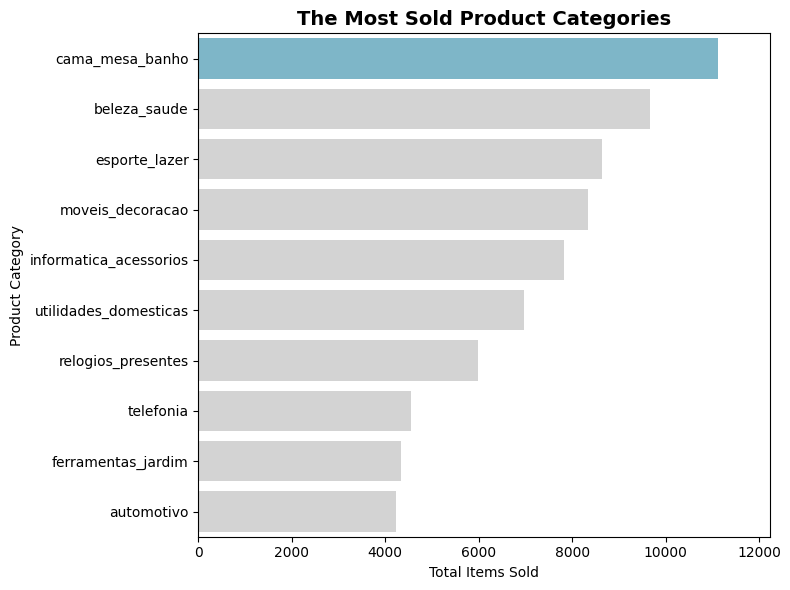

In [60]:
sales_by_category = df_merged_items_products.groupby('product_category_name')['order_item_id'].count().reset_index()
sales_by_category.columns = ['product_category_name', 'total_sold']
sales_by_category = sales_by_category.sort_values('total_sold', ascending=False)

top_10 = sales_by_category.head(10)
bottom_10 = sales_by_category.tail(10).sort_values('total_sold', ascending=True)

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_10,
    y='product_category_name',
    x='total_sold',
    palette=colors
)
plt.title("The Most Sold Product Categories", fontsize=14, fontweight='bold')
plt.xlabel("Total Items Sold")
plt.ylabel("Product Category")
plt.xlim(0, top_10['total_sold'].max()*1.1)
plt.tight_layout()
plt.show()

<ipython-input-61-0f64efe3e103>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


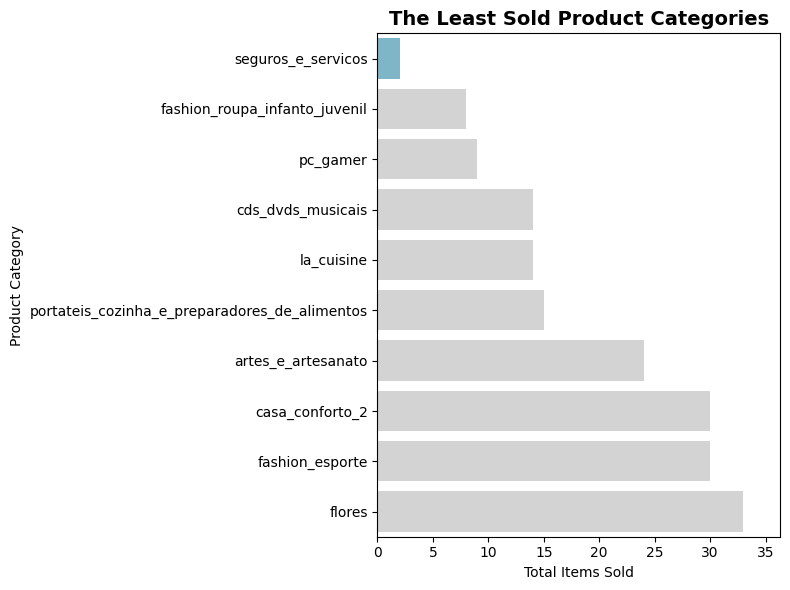

In [61]:
plt.figure(figsize=(8, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    data=bottom_10,
    y='product_category_name',
    x='total_sold',
    palette=colors
)
plt.title("The Least Sold Product Categories", fontsize=14, fontweight='bold')
plt.xlabel("Total Items Sold")
plt.ylabel("Product Category")
plt.xlim(0, bottom_10['total_sold'].max()*1.1)
plt.tight_layout()
plt.show()

**Insight:**
- Kategori produk yang banyak dibeli yaitu cama_mahaso sebanyak 11.115 yang menandakan customer menyukai produk pada kategori tersebut yang mana produk yang ada pada kategori tersebut dapat sering diiklankan karena relevan dengan banyak customer.
- Sementara kategori produk yang paling sedikit dibeli yaitu seguros_e_servicos sebanyak 2 yang menandakan kurangnya peminat pada kategori produk tersebut yang mana kategori tersebut bisa untuk tidak sering diiklankan karena tidak relevan untuk customer yang melakukan transaksi di Olist.

### Pertanyaan 2: Bagaimana sebaran pesanan berdasarkan waktu hari dan bulan ? Apakah ada pola musiman ?

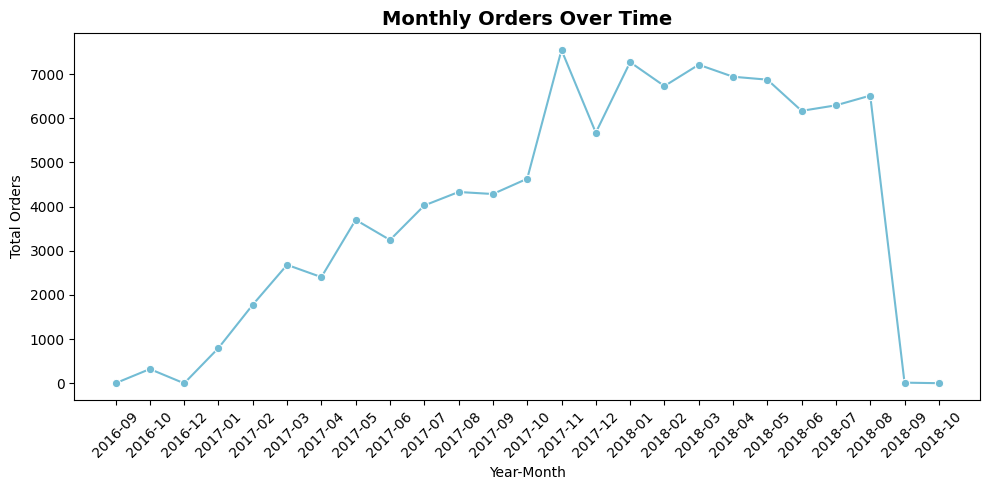

In [62]:
orders_per_month = orders_df.groupby('year_month')['order_id'].count().reset_index()
orders_per_month.columns = ['year_month', 'total_orders']
orders_per_month['year_month'] = orders_per_month['year_month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=orders_per_month, x='year_month', y='total_orders', marker='o', color='#72BCD4')
plt.title("Monthly Orders Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year-Month")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

orders_per_day = orders_df.groupby('day_of_week')['order_id'].count().reset_index()
orders_per_day.columns = ['day_of_week', 'total_orders']

<ipython-input-63-a650f418183b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_per_day, x='day_of_week', y='total_orders', palette=colors)


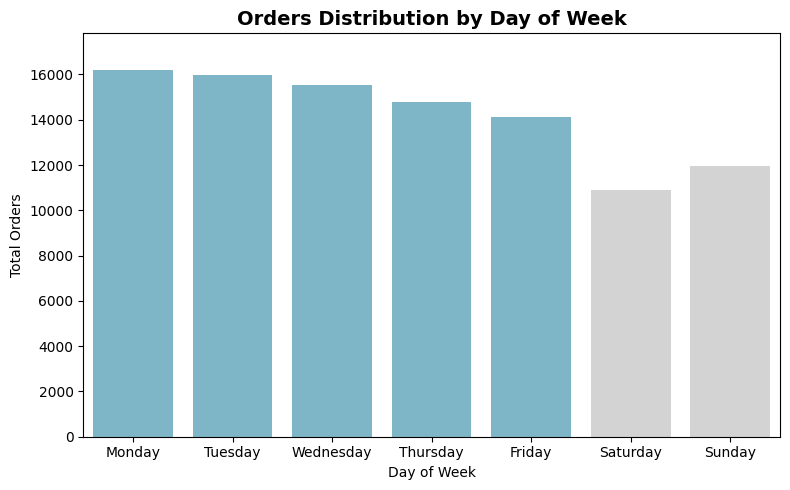

In [63]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
orders_per_day['day_of_week'] = pd.Categorical(orders_per_day['day_of_week'], categories=days_order, ordered=True)
orders_per_day = orders_per_day.sort_values('day_of_week')

plt.figure(figsize=(8, 5))
colors = ["#72BCD4","#72BCD4","#72BCD4", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3"]
sns.barplot(data=orders_per_day, x='day_of_week', y='total_orders', palette=colors)
plt.title("Orders Distribution by Day of Week", fontsize=14, fontweight='bold')
plt.xlabel("Day of Week")
plt.ylabel("Total Orders")
plt.ylim(0, orders_per_day['total_orders'].max()*1.1)
plt.tight_layout()
plt.show()

**Insight:**
- Tidak ditemukan pola musiman pada order bulanan, karena yang terjadi adalah peningkatan order secara konsisten kemudian order stabil
- Pada waktu harian, pembeli cenderung melakukan order pada hari kerja yaitu Monday, Tuesday, Wednesday, Thursday, Friday sementara terjadi penurunan yang lumayan baru hari libur yaitu saturday dan sunday

### Pertanyaan 3: Bagaimana performa penjualan dan revenue keseluruhan e-commerce dalam beberapa tahun terakhir ?

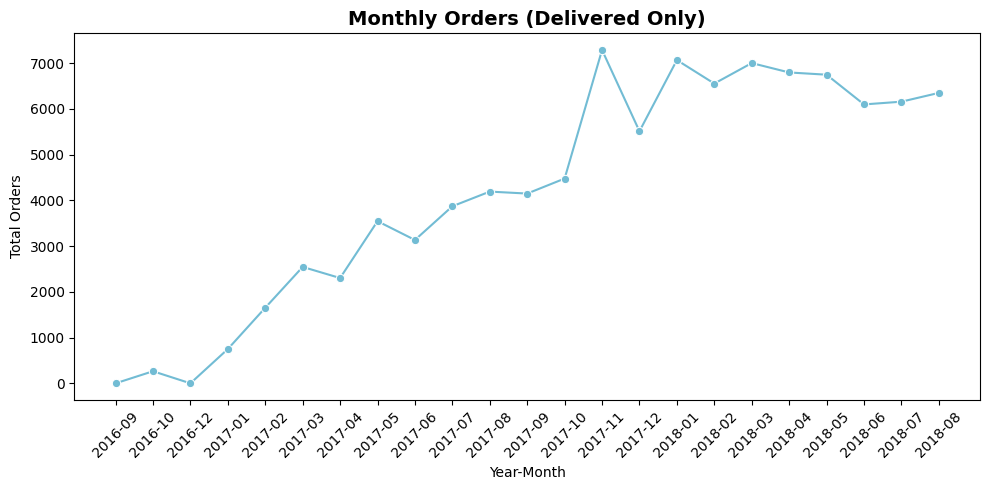

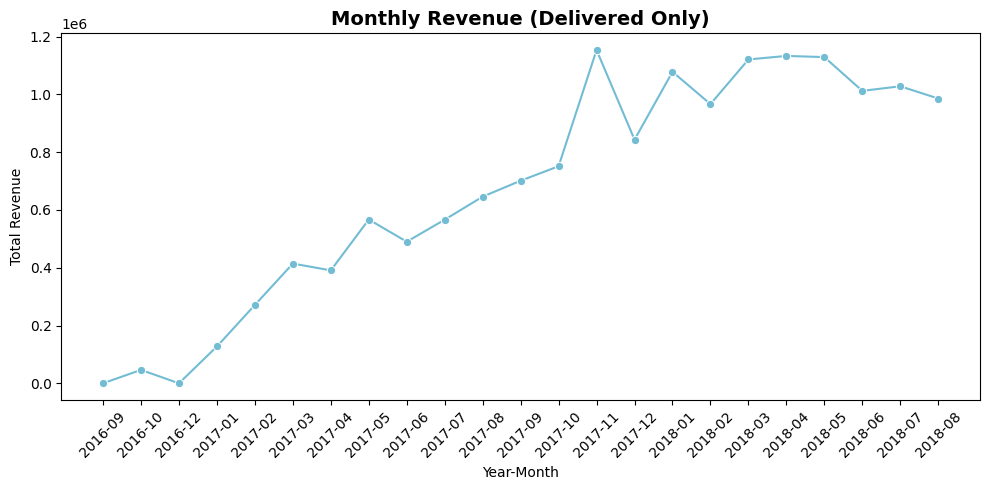

In [64]:
monthly_perf = orders_items_merged.groupby('year_month').agg({
    'order_id': 'nunique',
    'total_revenue': 'sum'
}).reset_index()
monthly_perf.columns = ['year_month', 'total_orders', 'total_revenue']
monthly_perf['year_month'] = monthly_perf['year_month'].astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_perf, x='year_month', y='total_orders', marker='o', color='#72BCD4')
plt.title("Monthly Orders (Delivered Only)", fontsize=14, fontweight='bold')
plt.xlabel("Year-Month")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_perf, x='year_month', y='total_revenue', marker='o', color='#72BCD4')
plt.title("Monthly Revenue (Delivered Only)", fontsize=14, fontweight='bold')
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Untuk order dan revenuenya cenderung meningkat dari tahun 2016 - 2017, kemudian stabil di tahun 2017 - Q3 2018 pada marketplace Olist yang berarti untuk sementara harus dipertahankan bahkan sebaiknya ditingkatkan dengan menambah promo atau marketing agar marketplace Olist dapat terus eksis dan digunakan oleh customernya saat ini bahkan agar customernya dapat semakin terus bertambah.

### Pertanyaan 4: Berapa banyak pesanan yang memiliki rating tinggi (3-5) dibandingkan dengan rating rendah (1-2) ?

<ipython-input-65-e884942f8dbf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_counts, x='rating_label', y='count', palette=colors)


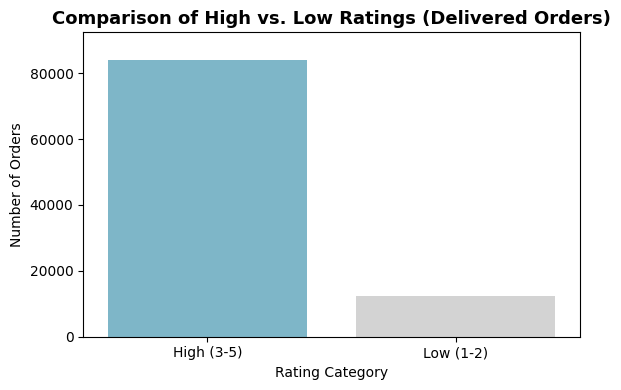

In [65]:
rating_counts = order_reviews_merged['rating_label'].value_counts().reset_index()
rating_counts.columns = ['rating_label', 'count']

plt.figure(figsize=(6, 4))
colors = ["#72BCD4", "#D3D3D3"]
sns.barplot(data=rating_counts, x='rating_label', y='count', palette=colors)
plt.title("Comparison of High vs. Low Ratings (Delivered Orders)", fontsize=13, fontweight='bold')
plt.xlabel("Rating Category")
plt.ylabel("Number of Orders")
plt.ylim(0, rating_counts['count'].max()*1.1)
plt.tight_layout()
plt.show()

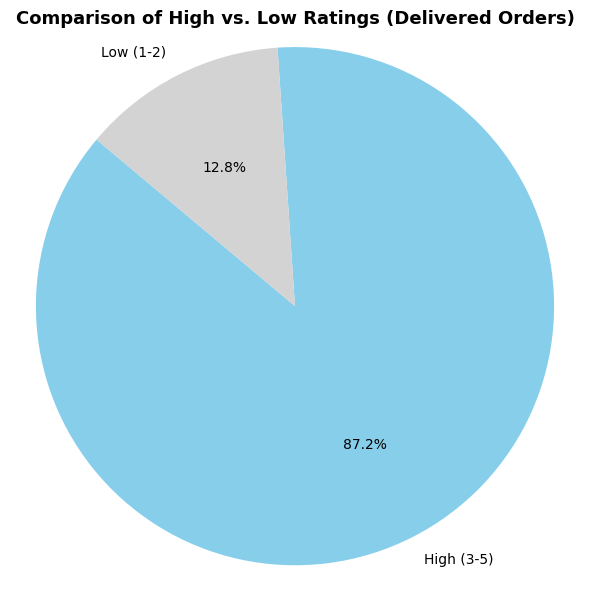

In [66]:
labels = rating_counts['rating_label']
sizes = rating_counts['count']

plt.figure(figsize=(6, 6))
colors = ["#87CEEB","#D3D3D3"]
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Comparison of High vs. Low Ratings (Delivered Orders)", fontsize=13, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Insight:**
- Dari keseluruhan Orders yang sudah sampai dapat disimpulkan bahwa mayoritas customer merasa puas, hal tersebut dapat dilihat dari rating yang tinggi yaitu rating 3-5 mencapai 87.2% nya, sementara rating rendah yaitu rating 1-2 hanya mencapai 12.8%. Hal ini tentunya perlu untuk terus ditingkatkan, dan untuk customer yang merasa belum puas dapat dicari tahu penyebabnya agar mereka dapat menemukan solusinya agar suatu saat dapat merasa puas untuk transaksi di Olist dan memberikan rating yang tinggi yaitu 3-5.

### Pertanyaan 5: Bagaimana retensi pelanggan (customer retention) atau churn rate (pelanggan yang hanya beli sekali pada Marketplace Olist)?

<ipython-input-67-f3836cfc5c47>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retention_counts, x='retention_label', y='count', palette=colors)


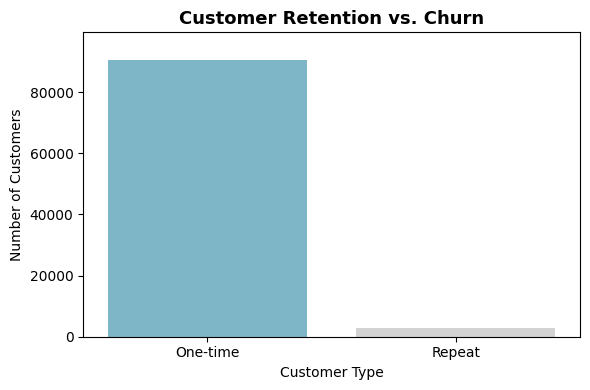

In [67]:
customer_order_counts = df_customer_orders.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_order_counts.columns = ['customer_unique_id', 'total_orders']

customer_order_counts['retention_label'] = customer_order_counts['total_orders'].apply(
    lambda x: 'One-time' if x == 1 else 'Repeat'
)

retention_counts = customer_order_counts['retention_label'].value_counts().reset_index()
retention_counts.columns = ['retention_label', 'count']

plt.figure(figsize=(6,4))
colors = ["#72BCD4", "#D3D3D3"]
sns.barplot(data=retention_counts, x='retention_label', y='count', palette=colors)
plt.title("Customer Retention vs. Churn", fontsize=13, fontweight='bold')
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.ylim(0, retention_counts['count'].max()*1.1)
plt.tight_layout()
plt.show()


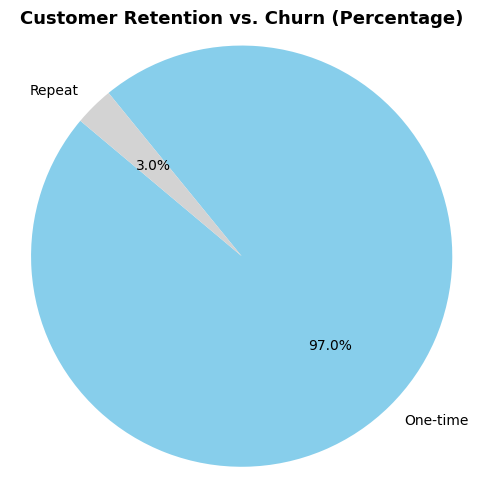

In [68]:
plt.figure(figsize=(5,5))
colors = ["#87CEEB","#D3D3D3"]
plt.pie(retention_counts['count'],
        labels=retention_counts['retention_label'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)
plt.title("Customer Retention vs. Churn (Percentage)", fontsize=13, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Insight:**
- Dari keseluruhan customer yang melakukan transaksi di Olist, hanya ada 3% customer yang pernah melakukan transaksi sebelumnya di Olist, sementara itu 97% baru sekali menggunakan Olist yang mana berarti 97% ini harus diyakinkan untuk melakukan order selanjutnya di Olist melalui berbagai strategi termasuk promo yang menarik.

## Analisis Lanjutan (Opsional) - RFM Analysis

Alasan untuk menggunakan RFM Analysis yaitu untuk analisis lanjutan agar mendapatkan informasi tentang customer lebih banyak dibandingkan nomor 5 untuk mengetahui behavior customer secara lebih dalam.

In [69]:
df_orders_delivered = orders_df[orders_df['order_status'] == 'delivered'].copy()

df_merged = pd.merge(
    df_orders_delivered[['order_id','customer_id','order_purchase_timestamp']],
    order_items_df[['order_id','price','freight_value']],
    on='order_id',
    how='inner'
)

df_merged = pd.merge(
    df_merged,
    customers_df[['customer_id','customer_unique_id']],
    on='customer_id',
    how='left'
)

df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'], errors='coerce')

df_merged['total_revenue'] = df_merged['price'] + df_merged['freight_value']

snapshot_date = df_merged['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

In [70]:
rfm_df = df_merged.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'total_revenue': 'sum'
}).reset_index()

rfm_df.columns = ['customer_unique_id','last_purchase_date','frequency','monetary']

rfm_df['recency'] = (snapshot_date - rfm_df['last_purchase_date']).dt.days

rfm_df.head()

,customer_unique_id,last_purchase_date,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,141.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,27.19,115
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,196.89,288


In [71]:
def rfm_score_rank(data, col, ascending=True):
    ranked = data[col].rank(method='first', ascending=ascending)
    if ascending:
        return pd.qcut(ranked, 5, labels=[5,4,3,2,1])
    else:
        return pd.qcut(ranked, 5, labels=[1,2,3,4,5])

rfm_df['R_score'] = rfm_score_rank(rfm_df, 'recency', ascending=True).astype(int)
rfm_df['F_score'] = rfm_score_rank(rfm_df, 'frequency', ascending=False).astype(int)
rfm_df['M_score'] = rfm_score_rank(rfm_df, 'monetary', ascending=False).astype(int)

In [72]:
def rfm_segment(row):
    r_score = row['R_score']
    f_score = row['F_score']
    m_score = row['M_score']
    total_score = r_score + f_score + m_score

    if total_score >= 13:
        return 'Best Customers'
    elif total_score >= 10:
        return 'Loyal Customers'
    elif total_score >= 7:
        return 'Potential Loyalist'
    elif total_score >= 5:
        return 'At Risk'
    else:
        return 'Churned / Low Value'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

rfm_segments = rfm_df['Segment'].value_counts().reset_index()
rfm_segments.columns = ['Segment','Count']
rfm_segments


,Segment,Count
0,Potential Loyalist,38583
1,Loyal Customers,32206
2,At Risk,11879
3,Best Customers,7542
4,Churned / Low Value,3148


<ipython-input-73-04041596beeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_segments, x='Segment', y='Count', palette=colors)


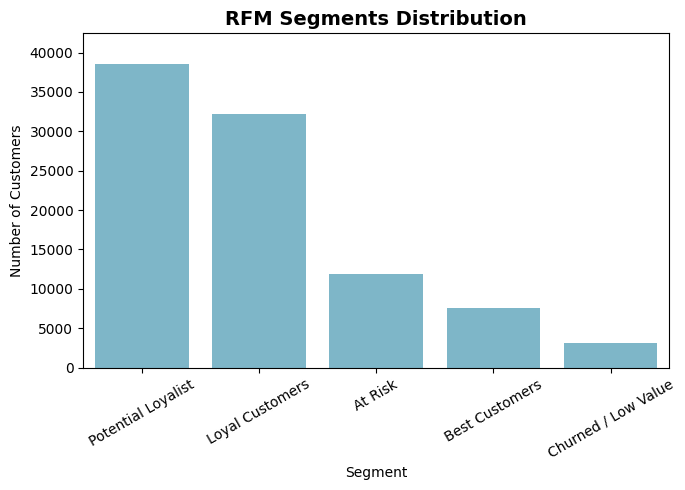

In [73]:
plt.figure(figsize=(7,5))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
sns.barplot(data=rfm_segments, x='Segment', y='Count', palette=colors)
plt.title("RFM Segments Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.ylim(0, rfm_segments['Count'].max()*1.1)
plt.tight_layout()
plt.show()

**Insight**
- Berdasarkan Skor RFM yang mana urutannya paling tinggi yang berarti paling baik yaitu Best Customer > Loyal Customers > Potential Loyalist > At Risk > Churned / Low Value, disimpulkan bahwa Potential Loyalist ini harus berusaha ditingkatkan karena mereka belum terlalu lama jadi customer maka bisa di approach dengan penawaran yang menarik agar dapat naik ke loyal customers, begitupun dengan loyal customers bisa dibikin loyalty program seperti badge silver, gold, diamond dsb agar semakin tertarik berbelanja dengan benefit yang terus bertambah sehingga dapat menjadi best customers, karena saat ini best Customers masih rendah, untuk At risk dapat melakukan re-engagement campaign agar mereka tidak turun menjadi churned / Low Value.

## Conclusion

- #1: Kategori produk apa yang paling banyak terjual dan yang terendah ? Kategori produk yang banyak dibeli yaitu cama_mahaso sebanyak 11.115 yang menandakan customer menyukai produk pada kategori tersebut yang mana produk yang ada pada kategori tersebut dapat sering diiklankan karena relevan dengan banyak customer. Sementara kategori produk yang paling sedikit dibeli yaitu seguros_e_servicos sebanyak 2 yang menandakan kurangnya peminat pada kategori produk tersebut yang mana kategori tersebut bisa untuk tidak sering diiklankan karena tidak relevan untuk customer yang melakukan transaksi di Olist.

- #2: Bagaimana sebaran pesanan berdasarkan waktu hari dan bulan ? Apakah ada pola musiman ? Tidak ditemukan pola musiman pada order bulanan, karena yang terjadi adalah peningkatan order secara konsisten kemudian order stabil. Pada waktu harian, pembeli cenderung melakukan order pada hari kerja yaitu Monday, Tuesday, Wednesday, Thursday, Friday sementara terjadi penurunan yang lumayan baru hari libur yaitu saturday dan sunday

- #3: Bagaimana performa penjualan dan revenue keseluruhan e-commerce dalam beberapa tahun terakhir ? Untuk order dan revenuenya cenderung meningkat dari tahun 2016 - 2017, kemudian stabil di tahun 2017 - Q3 2018 pada marketplace Olist yang berarti untuk sementara harus dipertahankan bahkan sebaiknya ditingkatkan dengan menambah promo atau marketing agar marketplace Olist dapat terus eksis dan digunakan oleh customernya saat ini bahkan agar customernya dapat semakin terus bertambah.

- #4: Berapa banyak pesanan yang memiliki rating tinggi (3-5) dibandingkan dengan rating rendah (1-2) ? Dari keseluruhan Orders yang sudah sampai dapat disimpulkan bahwa mayoritas customer merasa puas, hal tersebut dapat dilihat dari rating yang tinggi yaitu rating 3-5 mencapai 87.2% nya, sementara rating rendah yaitu rating 1-2 hanya mencapai 12.8%. Hal ini tentunya perlu untuk terus ditingkatkan, dan untuk customer yang merasa belum puas dapat dicari tahu penyebabnya agar mereka dapat menemukan solusinya agar suatu saat dapat merasa puas untuk transaksi di Olist dan memberikan rating yang tinggi yaitu 3-5.


- #5: Bagaimana retensi pelanggan (customer retention) atau churn rate (pelanggan yang hanya beli sekali pada Marketplace Olist)? Dari keseluruhan customer yang melakukan transaksi di Olist, hanya ada 3% customer yang pernah melakukan transaksi sebelumnya di Olist, sementara itu 97% baru sekali menggunakan Olist yang mana berarti 97% ini harus diyakinkan untuk melakukan order selanjutnya di Olist melalui berbagai strategi termasuk promo yang menarik.

- Analisis Lanjutan - RFM Analysis :Berdasarkan Skor RFM yang mana urutannya paling tinggi yang berarti paling baik yaitu Best Customer > Loyal Customers > Potential Loyalist > At Risk > Churned / Low Value, disimpulkan bahwa Potential Loyalist ini harus berusaha ditingkatkan karena mereka belum terlalu lama jadi customer maka bisa di approach dengan penawaran yang menarik agar dapat naik ke loyal customers, begitupun dengan loyal customers bisa dibikin loyalty program seperti badge silver, gold, diamond dsb agar semakin tertarik berbelanja dengan benefit yang terus bertambah sehingga dapat menjadi best customers, karena saat ini best Customers masih rendah, untuk At risk dapat melakukan re-engagement campaign agar mereka tidak turun menjadi churned / Low Value.

In [75]:
customers_df.to_csv("customers_clean_df.csv", index=False)
order_items_df.to_csv("order_items_clean_df.csv", index=False)
order_reviews_df.to_csv("order_reviews_clean_df.csv", index=False)
orders_df.to_csv("orders_clean_df.csv", index=False)
products_df.to_csv("products_clean_df.csv", index=False)